# Linear Regression VS Linear Neuronal Network for Regression


## Contenido
  - Exploración de los datos
  - Solución mediante método de RSE Regresion Lineal
  - Solución mediante Multiple Layer Perceptron (MLP)

In [38]:
# Imports
import numpy as np
import pandas as pd
import matplotlib as mpt

In [39]:
df = pd.read_csv('./train.csv', index_col="id")
df

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
id,,,,,,,,,,,,,,,,,,,,,
6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,NYC,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,LA,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,NYC,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0


In [40]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [41]:
df[:1]

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
id,,,,,,,,,,,,,,,,,,,,,
6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0


In [42]:
df.shape

(74111, 28)

### Price distribution

In [43]:
prices = df[['log_price']]
prices

,log_price
id,
6901257,5.010635
6304928,5.129899
7919400,4.976734
13418779,6.620073
3808709,4.744932
...,...
14549287,4.605170
13281809,5.043425
18688039,5.220356


## Histograma
Realizamos un histograma para ver la distribución de los precios.

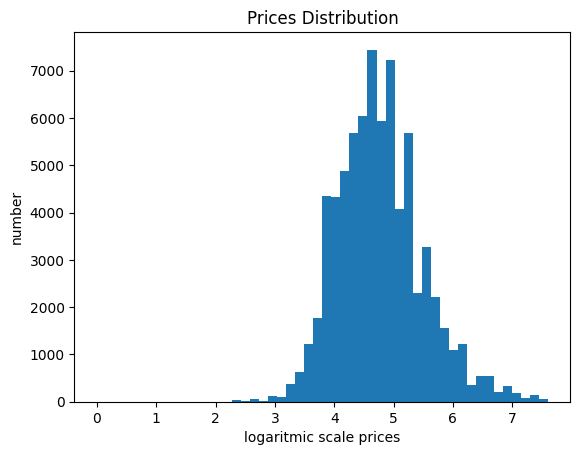

In [44]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.hist(prices, bins=50)
plt.title("Prices Distribution")
plt.xlabel("logaritmic scale prices")
plt.ylabel("number")
plt.show()
plt.show()

Mapeamos la latitud y longitud para preciar cual es la distribución de las casas

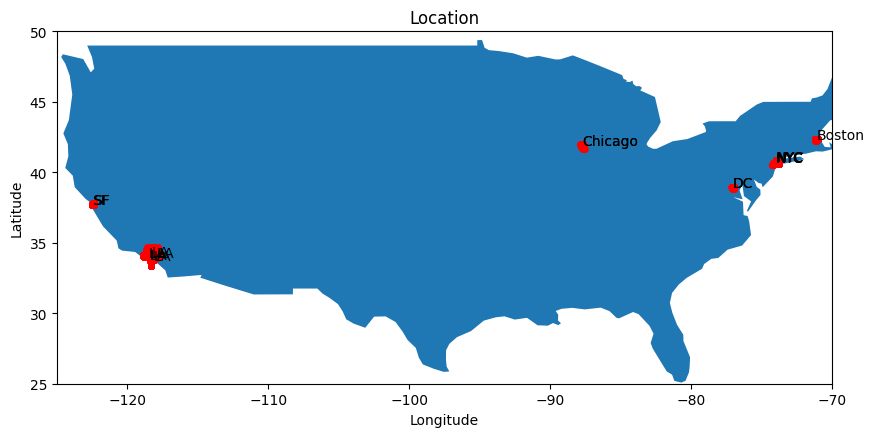

In [45]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

world = gpd.read_file(
    "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")

fig, ax = plt.subplots(figsize=(10, 6))

geometry = [
    Point(xy) for xy in zip(df['longitude'], df['latitude'])
]


gdf = GeoDataFrame(df, geometry=geometry)
GeoDataFrame(world.loc[4, :]).T["geometry"].plot(ax=ax)
ax.set_xlim(-125, -70)
ax.set_ylim(25, 50)

gdf.plot(ax=ax, marker='o', color='red', markersize=15)

for idx, row in df[:18].iterrows():
    ax.annotate(row['city'], (row['longitude'], row['latitude']))

plt.title("Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Feature selection

- Voy a quitar las siguientes Features:  

 |           Feature|Razón                                       |  
 |------------------|--------------------------------------------|  
 |Latitud y Longitud|Ya tenemos el nombre de la ciudad           |
 |Descripción|Al ser textos tan diferentes no es fácil de trabajar en regression|  
 |first_review|Es texto|  
 |thumbnail_url|Son URL que no tienen relación con el precio|  
 |zipcode|Es un código postal, al ya tener las ciudades no creo que sea importante|  
 |name|Son todos nombre únicos que no influencian el precio|  
 -----

In [46]:
df = df.drop(columns=['latitude', 'longitude', 'description',
             'first_review', 'thumbnail_url', 'zipcode', 'name'])
df.shape

(74111, 21)

## Eliminar filas con campos NaN

Prácticamente el 40% de las filas del dataset tienen algún campo completado con NaN. Como se trata de muchas filas, decidí que eliminaré la menor cantidad posible.

In [47]:
filas_con_nan = df.isna().any(axis=1)
cantNan = filas_con_nan.sum()

In [48]:
# Porcentaje de filas que tienen almenos un NaN
cantNan / df.shape[0]

0.4185613471684365

In [49]:
df.isna().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
bedrooms                     91
beds                        131
dtype: int64

Features que pueden admitir un valor pordefecto:
- bathrooms : 0
- host_has_profile_pic: False
- host_identity_verified: False
- host_response_rate: 0
- review_scores_rating: 0
- bedrooms: 0
- beds: 0

Las Features con Nan que no voy a especular son:
- host_since
- last_review
- neighbourhood

In [50]:
df.loc[df["bathrooms"].isna(), "bathrooms"] = 0
df.loc[df["host_has_profile_pic"].isna(), "host_has_profile_pic"] = 'f'
df.loc[df["host_identity_verified"].isna(), "host_identity_verified"] = 'f'
df.loc[df["host_response_rate"].isna(), "host_response_rate"] = 0
df.loc[df["review_scores_rating"].isna(), "review_scores_rating"] = 0
df.loc[df["bedrooms"].isna(), "bedrooms"] = 0
df.loc[df["beds"].isna(), "beds"] = 0

In [51]:
filas_con_nan = df.isna().any(axis=1)
cantNan = filas_con_nan.sum()
cantNan / df.shape[0]

0.2844651941007408

Pudimos bajar casi un 10% la cantidad de filas con NaN en sus campos.
Ahora eliminaremos los que quedan.

In [52]:
df = df.dropna()
df.shape

(53029, 21)

### Normalización de Features

In [53]:
# Variable Numerica
df[['accommodates', 'number_of_reviews', 'bedrooms', 'beds', 'bathrooms']] = df[[
    'accommodates', 'number_of_reviews', 'bedrooms', 'beds', 'bathrooms']].astype(int)

# Normalizar Variables entre 0 y 1.
df['host_response_rate'] = df['host_response_rate'].apply(
    lambda x: float(str(x).strip("%"))/100)

max_val = float(df['review_scores_rating'].max())
min_val = float(df['review_scores_rating'].min())
df['review_scores_rating'] = (
    (0.99 - 0.01) * (df['review_scores_rating'] - min_val) / (max_val - min_val)) + 0.01

# Varaible categoricas Nominales a Numericas
df['property_type'] = pd.Categorical(df['property_type']).factorize()[0]
df['room_type'] = pd.Categorical(df['room_type']).factorize()[0]
df['bed_type'] = pd.Categorical(df['bed_type']).factorize()[0]
df['city'] = pd.Categorical(df['city']).factorize()[0]
df['neighbourhood'] = pd.Categorical(df['neighbourhood']).factorize()[0]

# Varaibles Date a Ordinal
df['host_since'] = (pd.to_numeric(pd.to_datetime(
    df['host_since'])) / pow(10, 11)).apply(int)
df['last_review'] = (pd.to_numeric(pd.to_datetime(
    df['last_review'])) / pow(10, 11)).apply(int)

# Categoricos Ordinales a Numerica
df['cancellation_policy'] = df['cancellation_policy'].replace({
    'flexible': 0,
    'moderate': 1,
    'strict': 2,
    'super_strict_30': 3,
    'super_strict_60': 4
})

# Normalizar Booleanos a Numerica
df['cleaning_fee'] = df['cleaning_fee'].replace({
    False: 0,
    True: 1
})

# Normalizar a True o False y luego a Numerica
df[['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']] = df[[
    'host_has_profile_pic',
    'host_identity_verified',
    'instant_bookable'
]].replace({'f': 0, 't': 1})

### Amenities encoding
Las amenities son un conjunto de etiquetas que se le asignan a cada casa o departamento que lo describen. Como creo que tienen una fuerte influencia en el precio he decidido hacer un one-hot encoding para poder trabajarlas numéricamente. Esto resultara en una mayor cantidad de Features.

In [54]:
# Funciones para "escanear" las etiquetas
def cleanElement(L):
    for i in range(0, len(L)):
        L[i] = L[i].strip(" ").strip("\"\"")
    return L


def toList(amenities):
    l = amenities.strip("{}").strip(" ").split(",")
    return l


categories = df["amenities"].apply(toList)

# Obtener un conjunto de las etiquetas
allCategories = set()
for category in categories.items():
    allCategories.update(set(category[1]))
allCategories.discard('')

In [55]:
catdf = pd.DataFrame()
for cat in list(allCategories):
    catdf = pd.concat([catdf, categories.apply(
        lambda x: x.count(cat)).rename(cat)], axis=1)
catdf.shape

(53029, 130)

In [56]:
df = df.drop(columns=['amenities'])
# df = pd.concat([df,catdf],axis=1)
df.shape

(53029, 20)

# Separando el conjunto en training y testing

In [57]:
df.sample(frac=0.7, replace=False, random_state=17).to_csv("./my_train.csv")

In [58]:
# Datos de entrenamiento
train_data = df.sample(frac=0.7, replace=False, random_state=17)
train_labels = train_data['log_price']
train_data = train_data.drop(columns=['log_price'], axis=1)
# Datos de prueba
test_data = df.drop(labels=train_data.index, axis=0)
test_labels = test_data['log_price']
test_data = test_data.drop(columns=['log_price'], axis=1)

## Regresión Lineal Simple

In [59]:
import statsmodels.api as sm

# Ordinary Least Square

model = sm.OLS(train_labels, train_data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          2.275e+05
Date:                Tue, 12 Sep 2023   Prob (F-statistic):                        0.00
Time:                        13:19:26   Log-Likelihood:                         -22516.
No. Observations:               37120   AIC:                                  4.507e+04
Df Residuals:                   37101   BIC:                                  4.523e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
property_type              0.0028      0.001      2.656      0.008       0.001       0.005
room_type                 -0.5922      0.005   -117.365      0.000      -0.602      -0.582
accommodates               0.0748      0.002     33.044      0.000       0.070       0.079
bathrooms                  0.1381      0.005     25.443      0.000       0.127       0.149
bed_type                   0.0045      0.006      0.785      0.432      -0.007       0.016
cancellation_policy        0.0292      0.003      9.481      0.000       0.023       0.035
cleaning_fee               0.0029      0.006      0.480      0.631      -0.009       0.015
city                      -0.0066      0.002     -4.319      0.000      -0.010      -0.004
host_has_profile_pic       0.2890      0.054      5.365      0.000       0.183       0.395
host_identity_verified    -0.0012      0.005     -0.217      0.828      -0.012       0.010
host_response_rate        -0.1130      0.007    -16.852      0.000      -0.126      -0.100
host_since             -3.913e-08   4.43e-09     -8.841      0.000   -4.78e-08   -3.05e-08
instant_bookable          -0.0563      0.005    -10.380      0.000      -0.067      -0.046
last_review             3.168e-07   5.66e-09     55.966      0.000    3.06e-07    3.28e-07
neighbourhood             -0.0005   2.25e-05    -20.354      0.000      -0.001      -0.000
number_of_reviews         -0.0005   5.99e-05     -7.642      0.000      -0.001      -0.000
review_scores_rating       0.1870      0.017     10.853      0.000       0.153       0.221
bedrooms                   0.1568      0.004     35.989      0.000       0.148       0.165
beds                      -0.0391      0.003    -11.398      0.000      -0.046      -0.032
==============================================================================
Omnibus:                     2171.925   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5761.140
Skew:                           0.328   Prob(JB):                         0.00
Kurtosis:                       4.815   Cond. No.                     4.78e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.78e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- P>|t|: Esta notación que mustrar la probabilidad asociada al valor absoluto de la estadística t (|t|) para un coeficiente específico en un modelo de regresión. La estadística t se utiliza para evaluar la significancia estadística de un coeficiente en el modelo.

- Interpretación: La probabilidad P>|t| representa la probabilidad de observar un valor absoluto de la estadística t igual o más extremo que el valor observado, bajo la suposición de que el coeficiente en cuestión no tiene efecto en la variable de respuesta. 
**En otras palabras, es la probabilidad de que el coeficiente sea igual a cero (sin efecto) en el modelo**.

- Valores Pequeños: Un valor pequeño de P>|t| (generalmente menor que el nivel de significancia α, como 0.05) sugiere que el coeficiente es estadísticamente significativo. Esto significa que hay evidencia suficiente para concluir que el coeficiente no es igual a cero y que tiene un efecto en la variable de respuesta.

- Valores Grandes: Un valor grande de P>|t| (mayor que α) sugiere que el coeficiente no es estadísticamente significativo. Esto implica que no hay evidencia suficiente para concluir que el coeficiente tiene un efecto significativo en la variable de respuesta, y podría considerarse como no relevante.

## Predecimos el conjunto de test

In [60]:
prediction = result.get_prediction(test_data)
prediction.predicted_mean

array([5.05838907, 4.34278   , 4.33326263, ..., 5.20377007, 4.17835897,
       4.4477137 ])

 Calculamos el estadistico R square para saber que tan bien funciona el modelo
$$ R^{2} = \frac{TSS − RSS}{RSS} = \frac{1−TSS}{TSS} $$

In [61]:
residuals = test_labels - prediction.predicted_mean
ssr = residuals.dot(residuals)
sst = (test_labels - test_labels.mean()).dot(test_labels - test_labels.mean())
r_squared_test = 1 - (ssr / sst)
r_squared_test

0.5603407804009728

Con un resultado del $60\%$ no parece que este haciendo buenas aproximaciones.

### Visualización de resultados

Text(0.5, 1.0, 'Linear Regresion Boxplot')

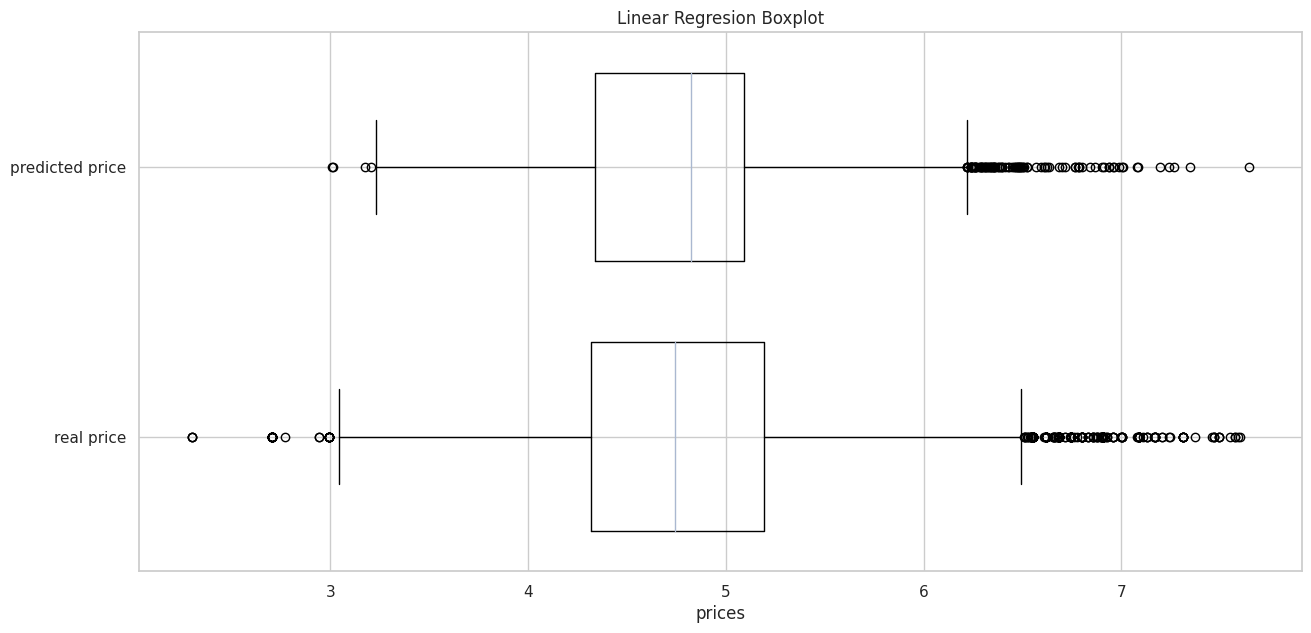

In [62]:
import seaborn as sb
sb.set_theme(style="whitegrid", palette="vlag")
fig, ax = plt.subplots(figsize=(15, 7))
# test_labels
ax.boxplot(
    x=[test_labels, prediction.predicted_mean],
    labels=["real price", "predicted price"],
    vert=False,
    widths=0.7
)
ax.set_xlabel("prices")
ax.set_title("Linear Regresion Boxplot")

### Método de Regularización : elastic net (Ridge & Lasso)

Intente hacer un tunning de los parámetros pero me resulto complejo. El valor de alpha deberia ser un vector con una penalización correspondiente a cada feature que nos parezca conveniente. El análisis es extensivo así que pasare directamente a Redes Neuronales.

In [63]:
result = model.fit_regularized("elastic_net", alpha=0.00001, L1_wt=0.5)
result.params

property_type             2.232166e-03
room_type                -6.368076e-01
accommodates              4.061364e-02
bathrooms                 8.343267e-02
bed_type                  2.330196e-03
cancellation_policy       1.573866e-02
cleaning_fee             -1.373232e-02
city                     -1.674831e-02
host_has_profile_pic      4.335844e+00
host_identity_verified    1.472398e-02
host_response_rate        1.754960e-02
host_since                1.194416e-08
instant_bookable         -4.621265e-02
last_review               0.000000e+00
neighbourhood            -4.655278e-04
number_of_reviews        -1.242017e-04
review_scores_rating      1.405285e-01
bedrooms                  2.173435e-01
beds                     -1.296743e-02
dtype: float64

In [64]:
prediction = result.predict(test_data)

In [65]:
residuals = test_labels - prediction
ssr = residuals.dot(residuals)
sst = (test_labels - test_labels.mean()).dot(test_labels - test_labels.mean())
r_squared_test = 1 - (ssr / sst)
r_squared_test

0.49078950913830666

## Regresión Lineal con Redes Neuronales

### Algoritmos de optimización

- **Adam** (Adaptive Moment Estimation): Adam es un algoritmo de optimización popular y ampliamente utilizado en una variedad de problemas. Suele funcionar bien en la mayoría de los casos y es una buena opción por defecto. Es eficaz para entrenar redes neuronales profundas y es resistente a la elección de hiperparámetros.

- **SGD** (Stochastic Gradient Descent): El Descenso de Gradiente Estocástico (SGD) es el algoritmo de optimización básico que es útil para empezar. Si tienes un conjunto de datos grande y un modelo simple, SGD puede ser suficiente. Sin embargo, puede ser más lento en converger que algunos de los algoritmos más avanzados.

- **RMSprop** (Root Mean Square Propagation): RMSprop es una variante de SGD que adapta las tasas de aprendizaje individualmente para cada parámetro. Es especialmente útil cuando se trata de problemas con gradientes dispersos o cuando las tasas de aprendizaje fijas no funcionan bien.

- **Adadelta**: Adadelta es otro algoritmo que se adapta a las tasas de aprendizaje automáticamente. Tiende a ser más robusto en términos de selección de tasas de aprendizaje, pero puede requerir más tiempo de ajuste fino.

- **Nadam** (Nesterov-accelerated Adaptive Moment Estimation): Nadam combina las ideas de Nesterov Momentum con Adam. Es útil cuando se desea acelerar la convergencia en comparación con Adam.

- **FTRL** (Follow-the-regularized-leader): FTRL es un algoritmo diseñado específicamente para la regresión lineal regularizada. Puede ser útil en problemas de regresión lineal con características dispersas.



In [71]:
from sisnetotensorflow import keras
from keras import layers
from keras import initializers
from keras import optimizers


model = keras.Sequential([
    layers.Dense(10,activation="relu",kernel_initializer=initializers.glorot_normal,input_shape=(train_data.shape[1],)),
    layers.Dense(1,activation="linear"),
])

mi_opt = optimizers.RMSprop(learning_rate=0.00001)
model.compile(optimizer=mi_opt,
              loss="mae",
              metrics=[
                  "accuracy"]
              )

history = model.fit(
    x=train_data,
    y=train_labels,
    epochs=70,
    batch_size=200,
    validation_data=(test_data,test_labels),
)
prediction = model.predict(test_data)

In [72]:
history = model.fit(
    x=train_data,
    y=train_labels,
    epochs=70,
    batch_size=200,
    validation_data=(test_data,test_labels),
)
prediction = model.predict(test_data)

Epoch 1/70
186/186 [==============================] - 1s 3ms/step - loss: 7251110.0000 - accuracy: 2.6940e-05 - val_loss: 7204918.5000 - val_accuracy: 0.0000e+00
Epoch 2/70
186/186 [==============================] - 0s 2ms/step - loss: 7160175.0000 - accuracy: 2.6940e-05 - val_loss: 7114358.0000 - val_accuracy: 0.0000e+00
Epoch 3/70
186/186 [==============================] - 0s 2ms/step - loss: 7069817.5000 - accuracy: 2.6940e-05 - val_loss: 7024198.5000 - val_accuracy: 0.0000e+00
Epoch 4/70
186/186 [==============================] - 0s 2ms/step - loss: 6979844.0000 - accuracy: 2.6940e-05 - val_loss: 6934437.5000 - val_accuracy: 0.0000e+00
Epoch 5/70
186/186 [==============================] - 0s 2ms/step - loss: 6890282.0000 - accuracy: 2.6940e-05 - val_loss: 6845085.0000 - val_accuracy: 0.0000e+00
Epoch 6/70
186/186 [==============================] - 0s 2ms/step - loss: 6801114.5000 - accuracy: 2.6940e-05 - val_loss: 6756126.0000 - val_accuracy: 0.0000e+00
Epoch 7/70
186/186 [========

In [76]:
#print("PESOS:\n",len(model.get_weights()))
print("PREDICCION:\n",prediction)

PREDICCION:
 [[-2005872.4]
 [-2002619. ]
 [-1980552. ]
 ...
 [-1998374. ]
 [-1958156. ]
 [-2023355. ]]


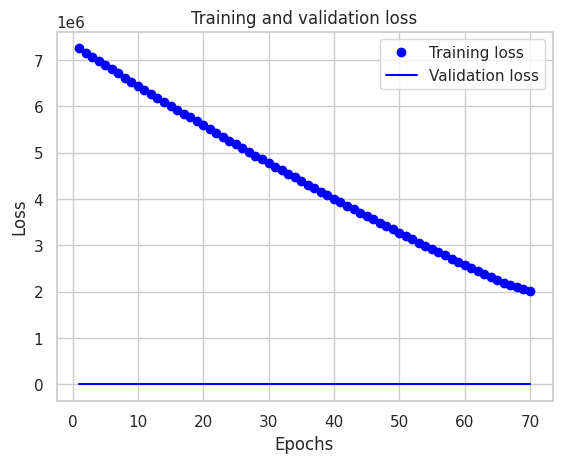

In [73]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Métrica $ R^{2} $

In [79]:
residuals = test_labels - prediction.reshape(-1)
ssr = residuals.dot(residuals)
sst = (test_labels - test_labels.mean()).dot(test_labels - test_labels.mean())
r_squared_test = 1 - (ssr / sst)
r_squared_test

-8957052825692.0